In [1]:
import geopandas as gpd

In [2]:
df = gpd.read_file('data/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')

In [3]:
print(df.crs)

epsg:4269


In [4]:
import matplotlib.pyplot as plt

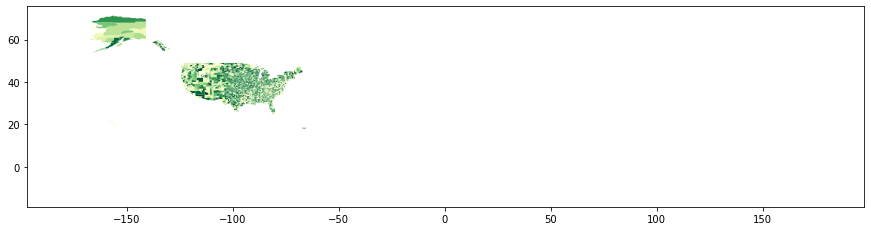

In [5]:
fig, ax = plt.subplots(figsize = (15, 15))

df.plot(ax=ax, legend = True, k=12, cmap = 'YlGn')
#ax.set_xlim(-180, -52.55)
#ax.set_ylim(20, 80)
plt.show()

In [6]:
import pandas as pd

In [7]:
df2 = pd.read_pickle("output/us_race_census.pkl")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         3221 non-null   object 
 1   P005001      3221 non-null   float64
 2   P005003      3221 non-null   float64
 3   P005004      3221 non-null   float64
 4   P005005      3221 non-null   float64
 5   P005006      3221 non-null   float64
 6   P005007      3221 non-null   float64
 7   P005008      3221 non-null   float64
 8   P005009      3221 non-null   float64
 9   P005010      3221 non-null   float64
 10  state        3221 non-null   object 
 11  county       3221 non-null   object 
 12  Check_Total  3221 non-null   float64
 13  White        3221 non-null   float64
 14  Black        3221 non-null   float64
 15  Native       3221 non-null   float64
 16  Asian        3221 non-null   float64
 17  Pacific      3221 non-null   float64
 18  Mixed        3221 non-null   float64
 19  Hispan

In [8]:
df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [9]:
df_NY = df[df['STATEFP'] == '36']
df_NY.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
161,36,013,00974105,0500000US36013,36013,Chautauqua,06,2745967842,1139487496,"POLYGON ((-79.76215 42.24305, -79.76196 42.251..."
162,36,029,00974113,0500000US36029,36029,Erie,06,2700643194,476896403,"POLYGON ((-79.13689 42.56980, -79.13299 42.582..."
163,36,043,00974120,0500000US36043,36043,Herkimer,06,3655807440,120420521,"POLYGON ((-75.21911 43.05247, -75.21251 43.059..."
164,36,045,00974121,0500000US36045,36045,Jefferson,06,3285906470,1524628784,"MULTIPOLYGON (((-76.14753 43.94248, -76.14566 ..."
165,36,047,00974122,0500000US36047,36047,Kings,06,179671325,71098973,"POLYGON ((-74.04201 40.62605, -74.04199 40.626..."


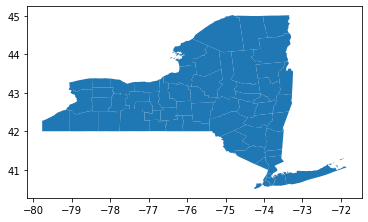

In [10]:
df_NY.plot()

In [11]:
from shapely.geometry import Polygon

In [12]:
lat_list = [40, 45, 45, 40]
lon_list = [-80, -80, -70, -70]
polygon_geom = Polygon(zip(lon_list, lat_list))
x,y = polygon_geom.exterior.xy

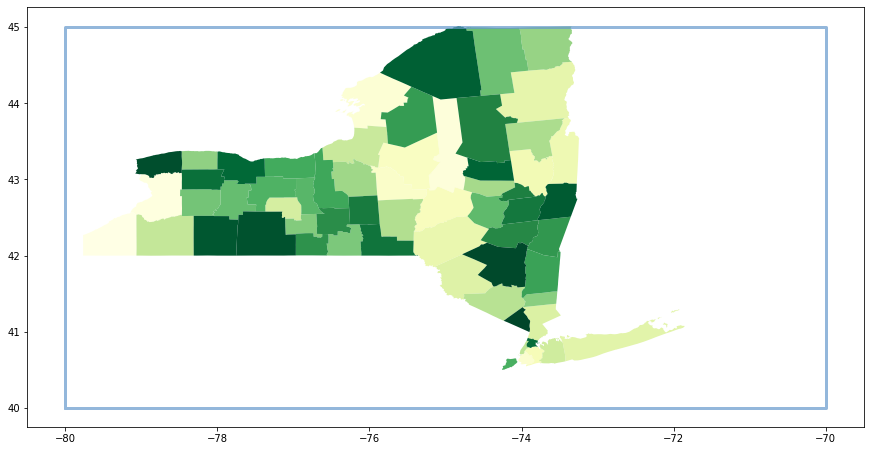

In [13]:
fig, ax = plt.subplots(figsize = (15, 15))

df_NY.plot(ax=ax, legend = True, k=12, cmap = 'YlGn')
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
#ax.set_xlim(-180, -52.55)
#ax.set_ylim(20, 80)
plt.show()

In [14]:
df.within(polygon_geom)

0       False
1       False
2       False
3       False
4       False
        ...  
3228    False
3229    False
3230    False
3231    False
3232    False
Length: 3233, dtype: bool

In [15]:
continental_US_lat_list = [20, 50, 50, 20]
continental_US_lon_list = [-130, -130, -60, -60]
polygon_us = Polygon(zip(continental_US_lon_list, continental_US_lat_list))
x_us,y_us = polygon_us.exterior.xy

In [16]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3233 non-null   object  
 1   COUNTYFP  3233 non-null   object  
 2   COUNTYNS  3233 non-null   object  
 3   AFFGEOID  3233 non-null   object  
 4   GEOID     3233 non-null   object  
 5   NAME      3233 non-null   object  
 6   LSAD      3233 non-null   object  
 7   ALAND     3233 non-null   int64   
 8   AWATER    3233 non-null   int64   
 9   geometry  3233 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 252.7+ KB


In [17]:
df_US = df[df.within(polygon_us)]
df_US

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


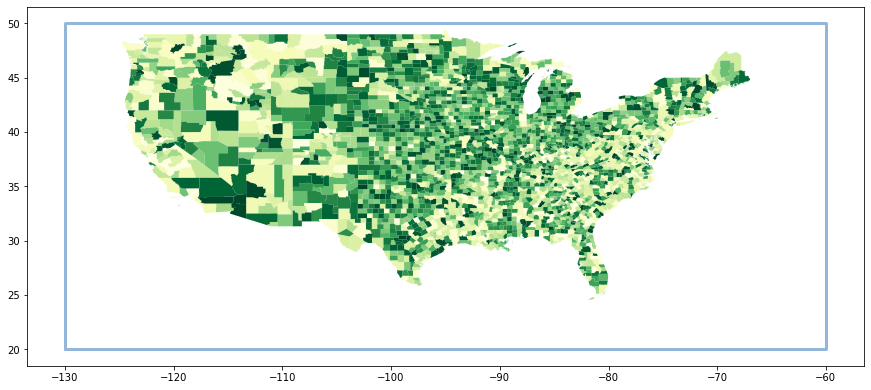

In [18]:
fig, ax = plt.subplots(figsize = (15, 15))

df_US.plot(ax=ax, legend = True, k=12, cmap = 'YlGn')
ax.plot(x_us, y_us, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
#ax.set_xlim(-180, -52.55)
#ax.set_ylim(20, 80)
plt.show()

In [19]:
df2.head()

,NAME,P005001,P005003,P005004,P005005,P005006,P005007,P005008,P005009,P005010,state,county,Check_Total,White,Black,Native,Asian,Pacific,Mixed,Hispanic
0,"Sebastian County, Arkansas",125744.0,91585.0,7848.0,2186.0,5039.0,69.0,82.0,3490.0,15445.0,05,131,125744.0,72.83,6.24,1.74,4.01,0.05,0.07,12.28
1,"Sevier County, Arkansas",17058.0,10416.0,717.0,324.0,62.0,2.0,19.0,298.0,5220.0,05,133,17058.0,61.06,4.20,1.90,0.36,0.01,0.11,30.60
2,"Sharp County, Arkansas",17264.0,16399.0,91.0,164.0,49.0,2.0,4.0,265.0,290.0,05,135,17264.0,94.99,0.53,0.95,0.28,0.01,0.02,1.68
3,"Stone County, Arkansas",12394.0,11912.0,11.0,82.0,45.0,3.0,3.0,181.0,157.0,05,137,12394.0,96.11,0.09,0.66,0.36,0.02,0.02,1.27
4,"Union County, Arkansas",41639.0,25722.0,13674.0,127.0,196.0,11.0,18.0,431.0,1460.0,05,139,41639.0,61.77,32.84,0.31,0.47,0.03,0.04,3.51


In [20]:
df2['Other'] = df2['Native']+df2['Pacific']+df2['Mixed']

In [21]:
df2['Max'] = df2[['White', 'Black', 'Hispanic', 'Asian','Other']].values.max(axis=1)
df2['Min'] = df2[['White', 'Black', 'Hispanic', 'Asian','Other']].values.min(axis=1)
df2['Diversity'] = 100 - (df2['Max']-df2['Min'])

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         3221 non-null   object 
 1   P005001      3221 non-null   float64
 2   P005003      3221 non-null   float64
 3   P005004      3221 non-null   float64
 4   P005005      3221 non-null   float64
 5   P005006      3221 non-null   float64
 6   P005007      3221 non-null   float64
 7   P005008      3221 non-null   float64
 8   P005009      3221 non-null   float64
 9   P005010      3221 non-null   float64
 10  state        3221 non-null   object 
 11  county       3221 non-null   object 
 12  Check_Total  3221 non-null   float64
 13  White        3221 non-null   float64
 14  Black        3221 non-null   float64
 15  Native       3221 non-null   float64
 16  Asian        3221 non-null   float64
 17  Pacific      3221 non-null   float64
 18  Mixed        3221 non-null   float64
 19  Hispan

(array([686., 617., 651., 431., 369., 318., 132.,  17.]),
 array([  0,   5,  10,  20,  30,  40,  50,  60, 100]),
 <a list of 8 Patch objects>)

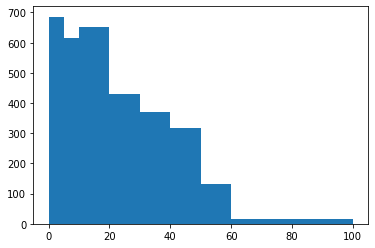

In [23]:
fig, ax = plt.subplots()
bins_list = [0, 5, 10, 20, 30, 40, 50, 60, 100]

ax.hist(df2['Diversity'], bins = bins_list)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         3221 non-null   object 
 1   P005001      3221 non-null   float64
 2   P005003      3221 non-null   float64
 3   P005004      3221 non-null   float64
 4   P005005      3221 non-null   float64
 5   P005006      3221 non-null   float64
 6   P005007      3221 non-null   float64
 7   P005008      3221 non-null   float64
 8   P005009      3221 non-null   float64
 9   P005010      3221 non-null   float64
 10  state        3221 non-null   object 
 11  county       3221 non-null   object 
 12  Check_Total  3221 non-null   float64
 13  White        3221 non-null   float64
 14  Black        3221 non-null   float64
 15  Native       3221 non-null   float64
 16  Asian        3221 non-null   float64
 17  Pacific      3221 non-null   float64
 18  Mixed        3221 non-null   float64
 19  Hispan

In [25]:
new_df = pd.merge(df_US,df2,how='left', left_on=['STATEFP','COUNTYFP'], right_on=['state','county'])

In [26]:
print(len(df_US.index), len(new_df.index), len(df2.index))

3108 3108 3221


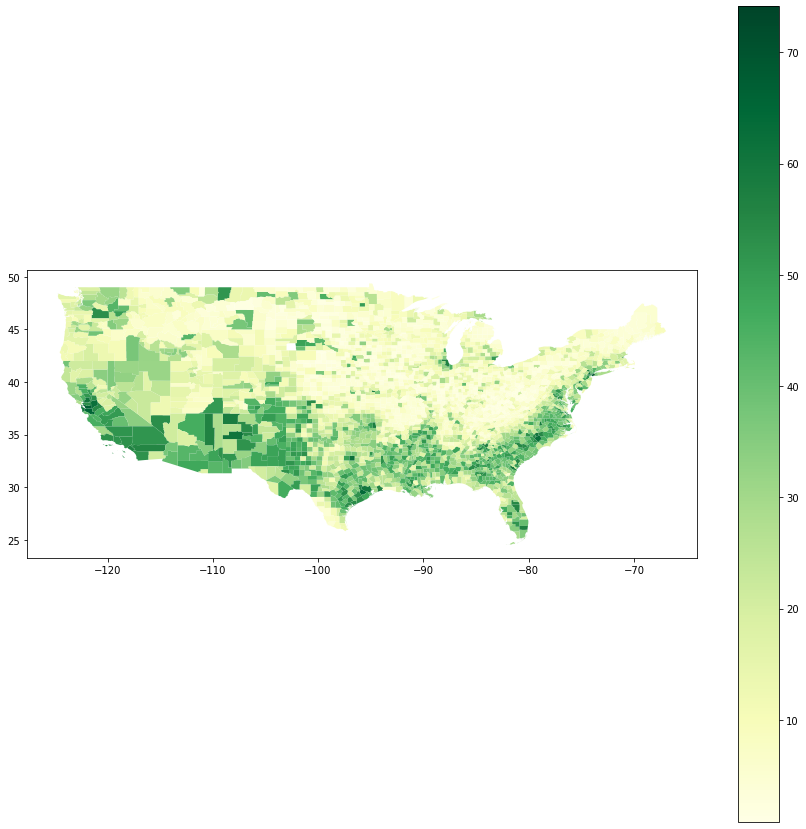

In [27]:
fig, ax = plt.subplots(figsize = (15, 15))

new_df.plot(column = 'Diversity', ax=ax, legend = True, k=12, cmap = 'YlGn')

plt.show()

In [28]:
new_df1 = new_df[['geometry','NAME_y','White','Black','Asian','Hispanic','Other','Diversity']]
new_df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3108 entries, 0 to 3107
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geometry   3108 non-null   geometry
 1   NAME_y     3107 non-null   object  
 2   White      3107 non-null   float64 
 3   Black      3107 non-null   float64 
 4   Asian      3107 non-null   float64 
 5   Hispanic   3107 non-null   float64 
 6   Other      3107 non-null   float64 
 7   Diversity  3107 non-null   float64 
dtypes: float64(6), geometry(1), object(1)
memory usage: 218.5+ KB


In [29]:
new_df1.to_file("output/US_counties.geojson", driver='GeoJSON')

In [30]:
new_df[new_df['NAME_y'] == 'Robeson County, North Carolina']

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,...,Black,Native,Asian,Pacific,Mixed,Hispanic,Other,Max,Min,Diversity
1858,37,155,01026130,0500000US37155,37155,Robeson,06,2453435692,5076394,"POLYGON ((-79.46147 34.63042, -79.38133 34.718...",...,24.11,37.91,0.72,0.04,0.1,8.15,38.05,38.05,0.72,62.67
